# **Task 3: EDA for sellers and customers**

In [1]:
# Data processing
import pandas as pd
import numpy as np

In [2]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None

In [4]:
# Increase default figure and font sizes for easier viewing.
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## **Data importing and cleaning**

In [8]:
# This time we are going to import dataframe in an appropriate data types format
data_all_agg = pd.read_csv('data_raw/data_all_agg.csv', 
                           index_col=0,
                           dtype = {'order_id': str, 
                                    'seller_id': str, 
                                    'order_item_id': int, 
                                    'price': float, 
                                    'freight_value': float, 
                                    'product_weight_g':float, 
                                    'product_volume': float,
                                    'customer_city':str,
                                    'customer_state':str,
                                    'customer_lat': float,
                                    'customer_lng':float,
                                    'seller_city':str,
                                    'seller_state':str,
                                    'seller_lat': float,
                                    'seller_lng':float,
                                    'distance_km':float,
                                    'delivery_time':float,
                                    'delivery_speed':float},
                           parse_dates=['order_purchase_timestamp',
                                         'order_approved_at',
                                         'shipping_limit_date',
                                         'order_delivered_carrier_date',
                                         'order_delivered_customer_date',
                                         'order_estimated_delivery_date'])

In [6]:
# Check dtypes
data_all_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94653 entries, 0 to 94652
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     94653 non-null  int64         
 1   order_id                       94653 non-null  object        
 2   seller_id                      94653 non-null  object        
 3   order_item_id                  94653 non-null  int64         
 4   price                          94653 non-null  float64       
 5   freight_value                  94653 non-null  float64       
 6   product_weight_g               94653 non-null  float64       
 7   product_volume                 94653 non-null  float64       
 8   customer_city                  94653 non-null  object        
 9   customer_state                 94653 non-null  object        
 10  customer_lat                   94653 non-null  float64       
 11  customer_lng   

In [9]:
data_all_agg.head(2)

,order_id,seller_id,order_item_id,price,freight_value,product_weight_g,product_volume,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_km,delivery_time,delivery_speed,delivery_time_hours,delivery_time_days
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,58.9,13.29,650.0,3528.0,campos dos goytacazes,RJ,-21.762775,-41.309633,volta redonda,SP,-22.496953,-44.127492,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,301.50,182.0,1.656593,182.0,7
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,1,239.9,19.93,30000.0,60000.0,santa fe do sul,SP,-20.220527,-50.903424,sao paulo,SP,-23.565096,-46.518565,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-03 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,585.56,389.0,1.505296,389.0,16


## **Sellers delivery analysis**

In [45]:
data_seller_del_sp.to_csv('data_raw/data_sellers_del_sp.csv')

In [15]:
# create frame with top 
data_seller_del_sp = data_all_agg.groupby('seller_id').agg({'delivery_speed':'mean'}).sort_values(by=['delivery_speed'], ascending=False).reset_index()
data_seller_del_sp.head(2)

,seller_id,delivery_speed
0,fa5fdc4e4bb6bd1009ad0e4ac4096562,13.752426
1,28872dc528e978a639754bc8c2ce5a4c,13.068229


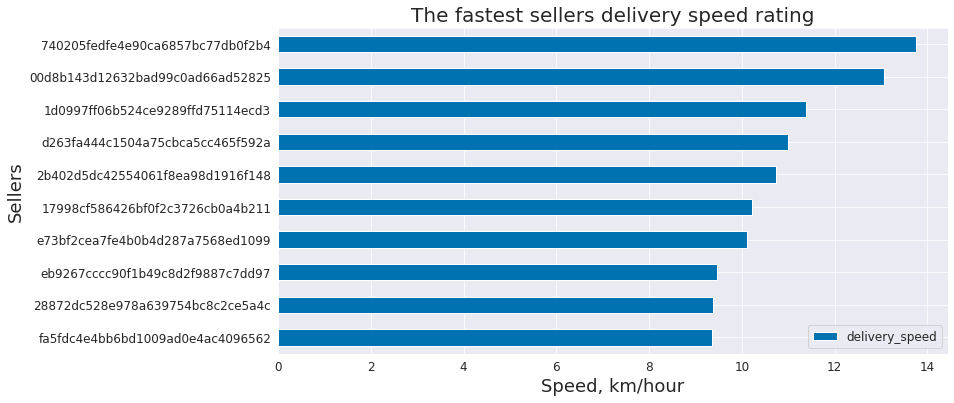

In [78]:
data_seller_del_sp.sort_values(by=['delivery_speed'])[-10:].plot(kind='barh')
plt.title('The fastest sellers delivery speed rating', fontsize=20)
plt.xlabel('Speed, km/hour', fontsize=18)
plt.ylabel('Sellers', fontsize=18)
plt.yticks([0, 1, 2, 3, 4 ,5, 6 ,7 ,8, 9], data_seller_del_sp.seller_id[:10])  # Set text labels and properties.
plt.show();

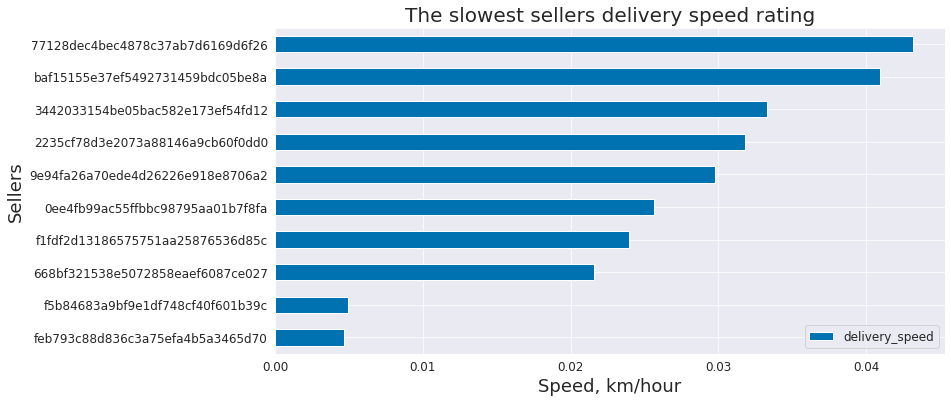

In [44]:
data_seller_del_sp.sort_values(by='delivery_speed', ascending=True)[:10].plot(kind='barh')
plt.title('The slowest sellers delivery speed rating', fontsize=20)
plt.xlabel('Speed, km/hour', fontsize=18)
plt.ylabel('Sellers', fontsize=18)
plt.yticks([0, 1, 2, 3, 4 ,5, 6 ,7 ,8, 9], data_seller_del_sp.seller_id[:])  # Set text labels and properties.
plt.show();

## **Sellers and customers delivery time and speed analysis**

To capture critical geo points, we need to visualize them on the map. Only for this purpose we have to filter below the average delivery time and delivery speed

In [53]:
mean_del_time = data_all_agg.delivery_time.mean()
mean_del_speed = data_all_agg.delivery_speed.mean()

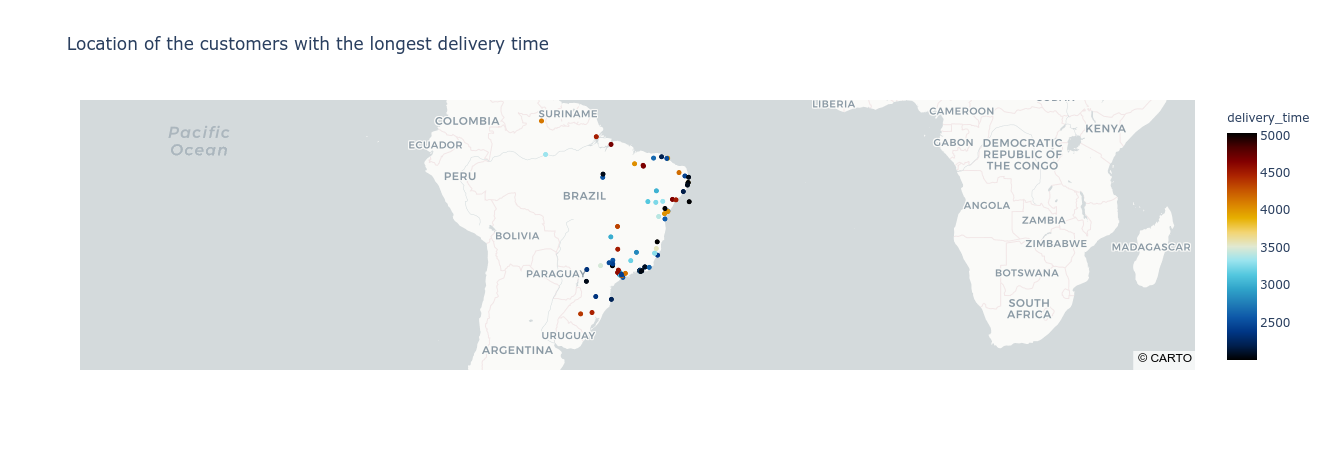

In [80]:
# Visualize the longest delivery time for customers
fig = px.scatter_mapbox(data_all_agg[data_all_agg.delivery_time > 2000], 
                        lat="customer_lat", 
                        lon="customer_lng", 
                        color="delivery_time", 
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=2,
                        mapbox_style="carto-positron",
                        title='Location of the customers with the longest delivery time')
fig.show()

In [64]:
# Check regions with the slowest delivery to customers
data_all_agg[data_all_agg.delivery_time > 2000]['customer_state'].value_counts()

SP    22
RJ    21
BA    11
CE     5
ES     5
PE     4
PA     3
MG     3
PB     2
PI     2
SC     2
PR     2
GO     2
RS     2
SE     2
AP     1
AM     1
MA     1
RN     1
AL     1
RR     1
Name: customer_state, dtype: int64

In [66]:
# Check regions with the slowest delivery to customers
data_all_agg[data_all_agg.delivery_time > 2000]['customer_city'].value_counts()[:5]

rio de janeiro    14
sao paulo          7
salvador           3
recife             2
nova friburgo      2
Name: customer_city, dtype: int64

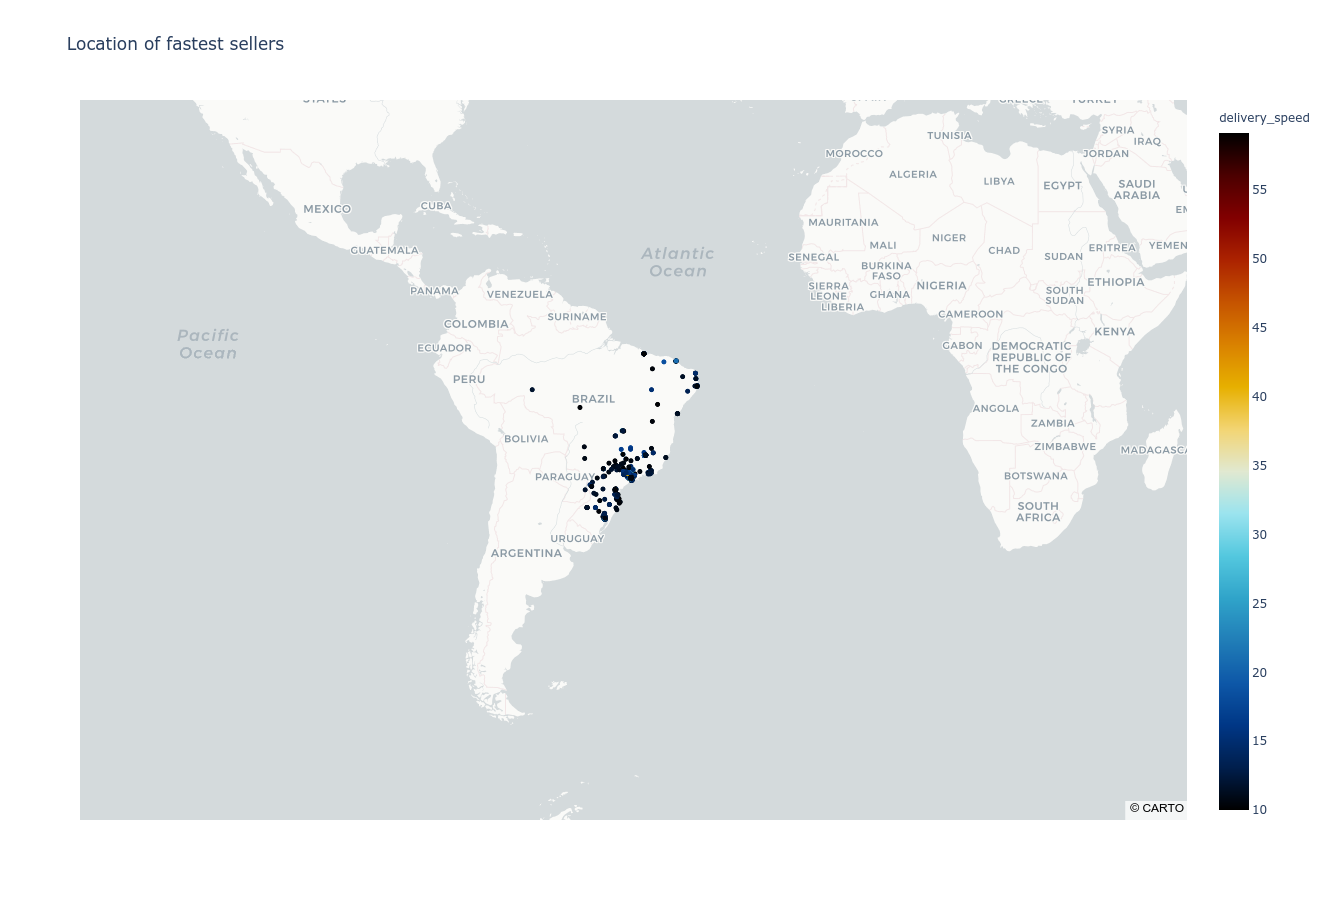

In [79]:
# Visualize the fastest sellers
fig = px.scatter_mapbox(data_all_agg[data_all_agg.delivery_speed > 10], 
                        lat="seller_lat", 
                        lon="seller_lng", 
                        color="delivery_speed", 
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=2,
                        mapbox_style="carto-positron",
                        title='Location of fastest sellers')
fig.show()

In [67]:
# Check region with the fastest sellers
data_all_agg[data_all_agg.delivery_speed > 10]['seller_state'].value_counts()

SP    403
RS     61
MA     49
MG     47
PE     46
PR     42
SC     20
RJ     17
CE      8
BA      7
DF      5
PB      3
GO      3
RN      3
RO      2
MS      2
ES      2
PI      1
MT      1
Name: seller_state, dtype: int64

In [68]:
# Check region with the fastest sellers
data_all_agg[data_all_agg.delivery_speed > 10]['seller_city'].value_counts()[:5]

sao paulo         212
sao luis           49
recife             44
belo horizonte     26
curitiba           23
Name: seller_city, dtype: int64

### **Correlation between delivery speed and time**

In [22]:
data_all_agg.head(2)

,order_id,seller_id,order_item_id,price,freight_value,product_weight_g,product_volume,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_km,delivery_time,delivery_speed,delivery_time_hours,delivery_time_days
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,58.9,13.29,650.0,3528.0,campos dos goytacazes,RJ,-21.762775,-41.309633,volta redonda,SP,-22.496953,-44.127492,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,301.50,182.0,1.656593,182.0,7
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,1,239.9,19.93,30000.0,60000.0,santa fe do sul,SP,-20.220527,-50.903424,sao paulo,SP,-23.565096,-46.518565,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-03 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,585.56,389.0,1.505296,389.0,16


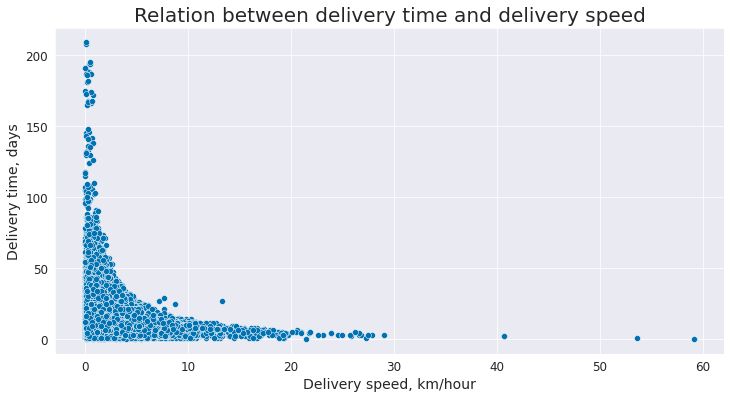

In [16]:
sns.scatterplot(x=data_all_agg.delivery_speed, y=data_all_agg.delivery_time_days);
plt.title('Relation between delivery time and delivery speed', fontsize=20)
plt.xlabel('Delivery speed, km/hour', fontsize=14)
plt.ylabel('Delivery time, days', fontsize=14)
plt.show();

In [18]:
from scipy import stats

In [19]:
stats.spearmanr(data_all_agg.delivery_speed, data_all_agg.delivery_time_days)

SpearmanrResult(correlation=0.02591473717637902, pvalue=1.5350610953373393e-15)

In [20]:
stats.pearsonr(data_all_agg.delivery_speed, data_all_agg.delivery_time_days)

(-0.10055956650431024, 3.268611554564232e-211)

In [21]:
stats.kendalltau(data_all_agg.delivery_speed, data_all_agg.delivery_time_days)

KendalltauResult(correlation=0.0050833094966961576, pvalue=0.021771644396695086)

### **Notes**

Клієнт додатково просив провести аналіз рангової кореляції між швидкістю доставки та часом доставки.